## <font color='green'><font size=4> Importing required libraries

In [129]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesRegressor
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import tree
from sklearn.ensemble import VotingClassifier

## Retrieving important features from the individual CSV's training dataset
### <font color='green'><font size=4> Function for adding stops from all the csv by observing the speed

In [49]:
def addingStops(main_directory, path):
    totalStops = []
    complete_path = main_directory + path
    os.chdir(complete_path)
    directory = os.path.join(main_directory, path)
    for root,dirs,files in os.walk(directory):
        for file in files:
            dfForIndividualCars = pd.read_csv(file)
            stops = 0
            dfForIndividualCars.speed_meters_per_second = round(dfForIndividualCars.speed_meters_per_second, 2) 
            for i, row in dfForIndividualCars.iterrows():
                rowNumber = i
                if dfForIndividualCars.speed_meters_per_second[rowNumber] == 0:
                    stops += 1
            totalStops.append(stops)        
    return totalStops

### <font color='green'><font size=4> Function for extracting total turns form the train csv

In [50]:
def totalTurns(main_directory, path):
    totalTurnsGreaterThanSixty = []
    complete_path = main_directory + path
    os.chdir(complete_path)
    directory = os.path.join(main_directory, path)
    for root,dirs,files in os.walk(directory):
        for file in files:
            dfForIndividualCars = pd.read_csv(file)
            n = dfForIndividualCars.heading_degrees
            turn = 0
            i = 0
            while(i<len(n)-3):
                x = n[i] - n[i+3]
                if(abs(x)>=60):
                    turn = turn + 1
                i = i+1
            totalTurnsGreaterThanSixty.append(turn)
    return totalTurnsGreaterThanSixty
  

### <font color='green'><font size=4> Function for extracting total distance from the csv by multiplying speed into the the time frame 

In [51]:
def distanceTravel(main_directory, path):
    totalTripDistance = []
    complete_path = main_directory + path
    os.chdir(complete_path)
    directory = os.path.join(main_directory, path)
    for root,dirs,files in os.walk(directory):
        for file in files:
            dfForIndividualCars = pd.read_csv(file)
#             dfForIndividualCars = pd.read_csv("0000.csv")
            n = dfForIndividualCars.time_seconds
            timeDiff = []
            i = 0
            while(i<len(n)-1):
                x = n[i+1] - n[i]
                timeDiff.append(x)
                i = i+1
            timeDiff.append(1)
            distanceTravelled = round(sum(dfForIndividualCars.speed_meters_per_second * timeDiff), 2)
            totalTripDistance.append(distanceTravelled)
    return totalTripDistance
# distanceTravel()

#### Loading data

## <font color='green'><font size=4> Reading the main csv(model_data_train.csv) and adding all the extracted feature (stops, turns, distance travelled) to their respective records 

 ###  <font color='green'><font size=4> Path for train dataset

In [52]:
main_dir = "D:\\"
path = "Projects\\work_sample\\trip_data_train\\trip_data"

In [53]:
os.chdir("D:\\Projects\\work_sample")
df = pd.read_csv("model_data_train.csv")
totalStops , turns, totalDistance = addingStops(main_dir, path), totalTurns(main_dir, path), distanceTravel(main_dir, path)
df['total_stops'] = totalStops
df['total_turns'] = turns
df['total_distance_travelled'] = totalDistance
# df.insert(totalStops, totalTurns, totalDistance)
df.head(10)

,filename,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,y,total_stops,total_turns,total_distance_travelled
0,0000.csv,False,False,True,5.209096,9789.261511,30753.872048,0.001010,5,13,1,9.373984e+03,0.317920,9.379193e+03,4.974085,0,1,6,9090.73
1,0001.csv,False,False,False,4.450941,10552.521899,33151.725274,0.001000,3,11,1,4.251619e+04,2.229321,4.252064e+04,3.151531,0,7,9,10718.68
2,0002.csv,False,False,True,5.396552,10233.433119,32149.278307,0.001015,6,13,1,1.305321e+07,34.259512,1.305322e+07,6.236594,0,0,20,16852.49
3,0003.csv,False,False,True,4.970163,10829.056746,34020.485118,0.000993,4,8,1,1.131908e+03,25.768714,1.136878e+03,3.968008,1,2,3,6664.49
4,0004.csv,False,False,False,5.266868,10678.703687,33548.137053,0.001009,6,11,1,3.163256e+03,145.154357,3.168523e+03,5.999782,0,34,18,2050.49
5,0005.csv,False,False,False,5.423508,8884.564535,27911.682675,0.000985,4,9,1,6.801067e+05,0.005726,6.801121e+05,3.974651,1,0,39,9507.89
6,0006.csv,False,False,True,4.261212,9896.063559,31089.400576,0.000994,6,11,1,6.486637e+03,0.000591,6.490899e+03,6.154283,1,145,9,1155.01
7,0007.csv,False,False,True,5.807669,9706.998432,30495.434961,0.001004,2,8,1,3.261819e+04,130.883996,3.262400e+04,2.071923,0,3,3,14724.65
8,0008.csv,False,False,True,4.778476,10459.224594,32858.623148,0.000988,7,15,1,8.394154e+02,0.872917,8.441939e+02,6.908172,0,6,0,6466.83
9,0009.csv,False,False,True,4.306586,11439.243623,35937.443729,0.001005,6,12,1,1.681729e+06,0.000263,1.681733e+06,6.063219,0,61,28,3479.76


### <font color='green'><font size=4> Checking for null values present in the dataframe

In [59]:
features_with_na = [features for features in df.columns] 
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,4),'% missing values')

filename 0.0 % missing values
feature1 0.0 % missing values
feature2 0.0 % missing values
feature3 0.0 % missing values
feature4 0.0 % missing values
feature5 0.0 % missing values
feature6 0.0 % missing values
feature7 0.0 % missing values
feature8 0.0 % missing values
feature9 0.0 % missing values
feature10 0.0 % missing values
feature11 0.0 % missing values
feature12 0.0 % missing values
feature13 0.0 % missing values
feature14 0.0 % missing values
y 0.0 % missing values
total_stops 0.0 % missing values
total_turns 0.0 % missing values
total_distance_travelled 0.0 % missing values


Here we can see that luckily there are no missing values in our data

### <font color='green'><font size=4>Analysing the summary of each feature (mean, standard deviation, minimum and maximum values)

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature4,1000.0,4.984873e+00,9.978161e-01,2.116270e+00,4.324381,4.990547,5.675052,8.819192e+00
feature5,1000.0,9.977841e+03,9.907735e+02,7.193513e+03,9314.992298,9961.242569,10678.569893,1.281991e+04
feature6,1000.0,3.134631e+04,3.112607e+03,2.259909e+04,29263.911371,31294.166476,33547.716728,4.027493e+04
feature7,1000.0,1.000379e-03,1.000897e-05,9.710078e-04,0.000993,0.001001,0.001007,1.034535e-03
feature8,1000.0,4.974000e+00,1.556839e+00,1.000000e+00,4.000000,5.000000,6.000000,1.000000e+01
feature9,1000.0,1.005300e+01,3.015507e+00,2.000000e+00,8.000000,10.000000,12.000000,2.200000e+01
feature10,1000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00
feature11,1000.0,8.861258e+08,1.957633e+10,8.550778e-03,795.922394,22948.228489,639529.540207,6.069658e+11
feature12,1000.0,8.845462e+03,8.087624e+04,4.504803e-08,0.132042,2.744109,78.292736,1.572134e+06
feature13,1000.0,8.861258e+08,1.957633e+10,4.320016e+00,800.946889,22953.537048,639534.048642,6.069658e+11


### <font color='green'><font size=3> Check for the features which have same value throughout the column

In [61]:
df[df["feature2"] == True]

,filename,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,y,total_stops,total_turns,total_distance_travelled


### <font color='green'><font size=3>We can observe that in feature2 all the rows are false so we can safely delete feature2 column

In [62]:
df.drop("feature2", inplace = True, axis = 1)

### <font color='green'><font size=3>Converting True and False values to 0 and 1 respectively in feature1 and feature3

In [63]:
df["feature1"] = df["feature1"].astype(int)

In [64]:
df["feature3"] = df["feature3"].astype(int)

### <font color='green'><font size=3>Dropping filename columns

In [65]:
df.drop("filename", axis = 1, inplace= True)

### <font color='green'><font size=3> Generating correlation matrix using seaborn heatmap to check which values are highly correlated with each other

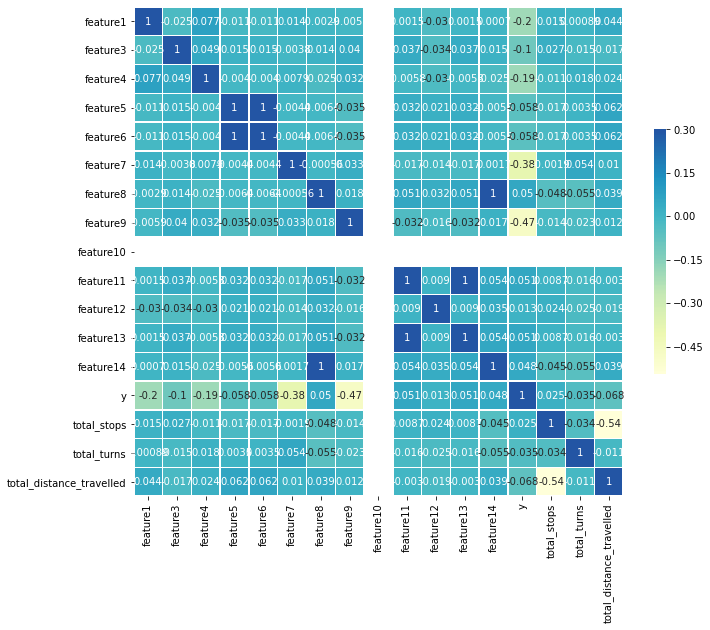

In [66]:
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, cmap = "YlGnBu" , annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
                        

### <font color='green'><font size=3>From the correlation plot below we can see that feature 6, 13,10 and 14 are highly correlated with some or the other features so we will opt to drop these columns and try to plot the correlation plot again

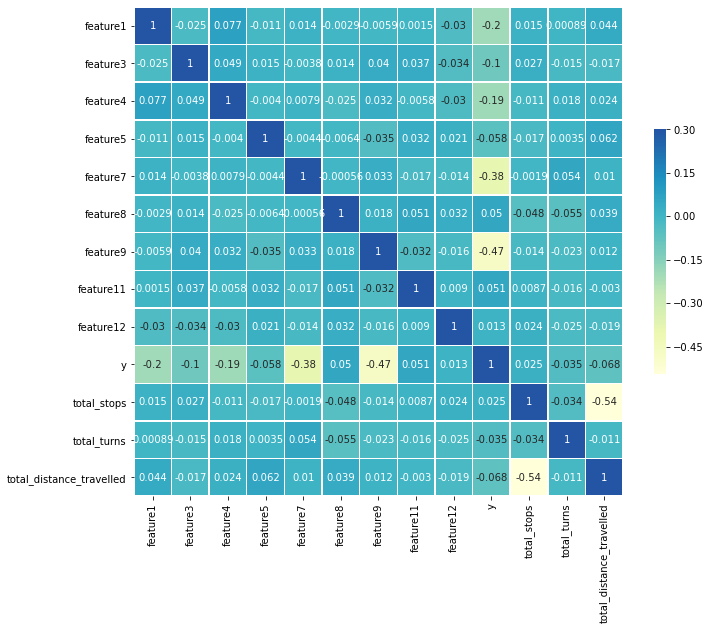

In [67]:
df.drop(["feature6", "feature13", "feature10", "feature14"], inplace = True, axis = 1)

corr = df.corr()

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap = "YlGnBu" , annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
                        

### <font color='green'><font size=3> Now we can observe that there no highly correlated features 

### <font color='green'><font size=3> We will check the histogram for feature9 as it is a major contributor towards variable y

[13, 11, 13, 11, 8, 15, 12, 10, 8, 8, 12, 10, 13, 11, 11, 10, 9, 17, 14, 13, 11, 11, 10, 11, 11, 10, 10, 13, 15, 9, 9, 10, 10, 14, 14, 11, 10, 12, 9, 8, 11, 15, 6, 12, 10, 15, 15, 17, 16, 12, 17, 8, 10, 10, 12, 9, 15, 10, 8, 10, 10, 16, 10, 6, 11, 15, 11, 13, 8, 13, 13, 13, 9, 10, 11, 11, 9, 10, 11, 8, 12, 12, 8, 11, 14, 10, 14, 9, 7, 10, 13, 7, 7, 11, 9, 10, 13, 6, 14, 12, 9, 12, 7, 10, 10, 18, 17, 12, 15, 10, 7, 11, 8, 9, 7, 12, 12, 15, 9, 12, 7, 14, 10, 9, 13, 10, 12, 11, 9, 14, 7, 10, 18, 14, 8, 10, 9, 10, 13, 9, 12, 8, 14, 15, 12, 8, 5, 12, 15, 11, 11, 5, 14, 6, 10, 9, 11, 15, 10, 10, 7, 8, 11, 11, 15, 11, 13, 9, 14, 12, 15, 12, 8, 14, 10, 16, 7, 9, 10, 11, 8, 12, 13, 10, 19, 7, 11, 10, 12, 9, 14, 10, 14, 14, 10, 9, 13, 6, 10, 9, 13, 12, 10, 10, 6, 15, 15, 9, 9, 11, 12, 10, 15, 12, 13, 13, 16, 12, 12, 11, 8, 11, 14, 7, 14, 10, 14, 11, 10, 14, 9, 11, 15, 13, 15, 14, 12, 9, 14, 9, 14, 11, 13, 8, 8, 8, 11, 12, 11, 11, 11, 8, 9, 12, 17, 11, 9, 11, 12, 11, 16, 9, 8, 11, 11, 12, 8, 16, 

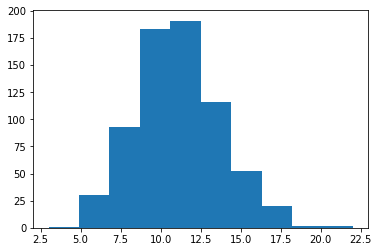

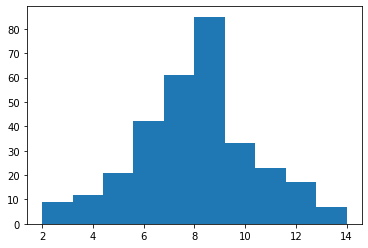

In [68]:
duplicate0 = []
duplicate1 = []
ind = 0
for i in df['y']:
    if(i == 0):
        duplicate0.append(df['feature9'][ind])
    else:
        duplicate1.append(df['feature9'][ind])
    ind = ind + 1
print((duplicate0))

print((duplicate1))
import matplotlib.pyplot as plt
_ = plt.hist(duplicate0)
_ = plt.show()
__ = plt.hist(duplicate1)
__ = plt.show()

    #print (ind)

#### From the correlation plot above we do observe that some of the features have great impact on the variable Y Let's check in detail and get those important features

#### <font color='green'><font size=4>Feature Importance

<font color='green'><font size=3> Creating instance of model, defining independent variables as X and target variable as y, and fitting the model

In [69]:
model = ExtraTreesRegressor()
y = df["y"]
df.drop("y", axis = 1, inplace = True)
X = df
model.fit(X,y)

ExtraTreesRegressor()

In [70]:
print(model.feature_importances_)

[0.04572579 0.02653563 0.09128912 0.05329137 0.21827962 0.05740361
 0.28571794 0.0428183  0.04269555 0.04813069 0.04373855 0.04437383]


<font color='green'><font size=3> Creating a Pandas Series for all the individual feature importance, then visualising it in a horizontal barplot thus sorting them by their importance

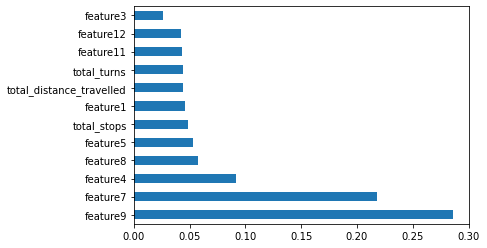

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
plt_features = pd.Series(model.feature_importances_, index = X.columns)
plt_features.nlargest(15).plot(kind = 'barh')
plt.show()

In [72]:
sorted_feature_importance=plt_features.sort_values(ascending=False)
sorted_feature_importance

feature9                    0.285718
feature7                    0.218280
feature4                    0.091289
feature8                    0.057404
feature5                    0.053291
total_stops                 0.048131
feature1                    0.045726
total_distance_travelled    0.044374
total_turns                 0.043739
feature11                   0.042818
feature12                   0.042696
feature3                    0.026536
dtype: float64

<font color='green'><font size=3> We can observe that feature 9 and feature7 are the two most important features and feature 11 and feature 3 are least contributing feature toward the Y variable. We will drop feature3

In [73]:
X.drop('feature3', axis = 1, inplace= True)

<font color='green'><font size=3> Splitting the data for further modelling

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<font color='green'><font size=3> Analyzing the distribution of 0 and 1 in y

In [75]:
print(Counter(y_train))

Counter({0: 468, 1: 232})


<font color='green'><font size=3> We can see the 1 is our minority class and there are not much instances of 1 in y variable. So we will use Synthetic Minority Oversampling TEchnique(SMOTE) for oversampling the train dataset

In [79]:
smote = SMOTE()

In [80]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before SMOTE" , Counter(y_train))
print("After SMOTE" , Counter(y_train_smote))

Before SMOTE Counter({0: 468, 1: 232})
After SMOTE Counter({1: 468, 0: 468})


<font color='green'><font size=3> Function for random forest with parameter tuning

In [85]:
#Random forest with tuning
def randomForest(X, Y):
    n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
    max_features = ['sqrt']
    max_depth = [int(x) for x in np.linspace(2, 5, num=6)]
    min_samples_split = [2, 5, 10, 15]
    min_samples_leaf = [1, 2, 5, 10]
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}
    rf_random_forest = RandomForestClassifier()
    rf_random = RandomizedSearchCV(estimator=rf_random_forest, param_distributions=random_grid,
                                   scoring='accuracy', n_iter=10, cv=15, verbose=2, random_state=38, n_jobs=1)
    return rf_random.fit(X,Y)
# randomForest(X_train, y_train)

<font color='green'><font size=3> Function for xgBoost with parameter tuning

In [86]:
## Xgboost with Hyper Parameter Optimization
def xgboostClassifier(X, Y):
    params={
     "learning_rate"    : [0.05] ,
     "max_depth"        : [ 2, 3, 4, 5],
     "min_child_weight" : [ 1, 2, 3, 4],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5],
     "colsample_bytree" : [ 0.2, 0.3]
    }

    classifier=xgboost.XGBClassifier()
    random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=15,verbose=3)
    xgb = random_search.fit(X,Y)
    return xgb

<font color='green'><font size=3> Function for Guassian Naive Bayes with parameter tuning

In [87]:
from sklearn.naive_bayes import GaussianNB
def gaussianNaive(X,Y):
    model_naive = GaussianNB()
    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
    gs_NB = RandomizedSearchCV(estimator=model_naive, 
                     param_distributions = params_NB, 
                     cv=10,
                     verbose=3, 
                     scoring='accuracy') 
    guassian = gs_NB.fit(X, Y)
    return guassian

<font color='green'><font size=3> Function to print confusion matrix and accuracy score

In [88]:
def cfAccuracy(test, pred):
    confusion_matrix(test, pred)
    classificationReport = metrics.classification_report(test, pred)
    overAllAccuracy = round(metrics.accuracy_score(test, pred),3)
    return overAllAccuracy, classificationReport

<font color='green'><font size=3> Building Random forest model

In [89]:
rf = randomForest(X_train_smote, y_train_smote)

Fitting 15 folds for each of 10 candidates, totalling 150 fits
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; tota

In [91]:
rf.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4}

<font color='green'><font size=3>  Checking out train and test accuracy for Random forest model

In [92]:
y_pred_rf_train = rf.predict(X_train_smote)
acc_rf, matrix_rf = cfAccuracy(y_train_smote, y_pred_rf_train)
print("train accuracy of the random forest model is " + str(acc_rf))
print(matrix_rf)
y_pred_rf = rf.predict(X_test)
acc_rf, matrix_rf = cfAccuracy(y_test, y_pred_rf)
print("test accuracy of the random forest model is " + str(acc_rf))
print(matrix_rf)

train accuracy of the random forest model is 0.89
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       468
           1       0.89      0.89      0.89       468

    accuracy                           0.89       936
   macro avg       0.89      0.89      0.89       936
weighted avg       0.89      0.89      0.89       936

test accuracy of the random forest model is 0.85
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       222
           1       0.69      0.78      0.73        78

    accuracy                           0.85       300
   macro avg       0.80      0.83      0.81       300
weighted avg       0.86      0.85      0.85       300



<font color='green'><font size=3>  Building xgBoost model

In [96]:
xgb = xgboostClassifier(X_train_smote, y_train_smote)

Fitting 15 folds for each of 5 candidates, totalling 75 fits


In [97]:
xgb.best_params_

{'min_child_weight': 2,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

<font color='green'><font size=3>  Checking out train and test accuracy for xgBoost model

In [98]:
y_pred_xgb_train = xgb.predict(X_train_smote)
acc_xgb, matrix_xgb = cfAccuracy(y_train_smote, y_pred_xgb_train)
print("train accuracy of the model is " + str(acc_xgb))
print(matrix_xgb)
y_pred_xgb = xgb.predict(X_test)
acc_xgb, mat_xgb = cfAccuracy(y_test, y_pred_xgb)
print("Test accuracy for Xgboost is", acc_xgb)
print(mat_xgb)

train accuracy of the model is 0.972
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       468
           1       0.97      0.97      0.97       468

    accuracy                           0.97       936
   macro avg       0.97      0.97      0.97       936
weighted avg       0.97      0.97      0.97       936

Test accuracy for Xgboost is 0.84
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       222
           1       0.69      0.69      0.69        78

    accuracy                           0.84       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.84      0.84      0.84       300



<font color='green'><font size=3>  Building Guassian Naive Bayes model

In [100]:
guass_naive = gaussianNaive(X_train_smote, y_train_smote)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ...........var_smoothing=2.310129700083158e-08; total time=   0.0s
[CV 2/10] END ...........var_smoothing=2.310129700083158e-08; total time=   0.0s
[CV 3/10] END ...........var_smoothing=2.310129700083158e-08; total time=   0.0s
[CV 4/10] END ...........var_smoothing=2.310129700083158e-08; total time=   0.0s
[CV 5/10] END ...........var_smoothing=2.310129700083158e-08; total time=   0.0s
[CV 6/10] END ...........var_smoothing=2.310129700083158e-08; total time=   0.0s
[CV 7/10] END ...........var_smoothing=2.310129700083158e-08; total time=   0.0s
[CV 8/10] END ...........var_smoothing=2.310129700083158e-08; total time=   0.0s
[CV 9/10] END ...........var_smoothing=2.310129700083158e-08; total time=   0.0s
[CV 10/10] END ..........var_smoothing=2.310129700083158e-08; total time=   0.0s
[CV 1/10] END ...........var_smoothing=1.873817422860383e-05; total time=   0.0s
[CV 2/10] END ...........var_smoothing=1.87381

<font color='green'><font size=3> Checking accuracy for Naive Bayes model

In [107]:
y_pred_naive_train = guass_naive.predict(X_train_smote)
acc_naive_train, mat_naive_train = cfAccuracy(y_train_smote, y_pred_naive_train)
print("Accuracy for naive is", acc_naive_train)
print(mat_naive_train)
y_pred_naive = guass_naive.predict(X_test)
acc_naive, mat_naive = cfAccuracy(y_test, y_pred_naive)
print("Accuracy for naive is", acc_naive)
print(mat_naive)

Accuracy for naive is 0.503
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       468
           1       0.71      0.01      0.02       468

    accuracy                           0.50       936
   macro avg       0.61      0.50      0.34       936
weighted avg       0.61      0.50      0.34       936

Accuracy for naive is 0.743
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       222
           1       1.00      0.01      0.03        78

    accuracy                           0.74       300
   macro avg       0.87      0.51      0.44       300
weighted avg       0.81      0.74      0.64       300



<font color='green'><font size=3>  From the accuracy above we can see that naive bayes has the least accuracy

<font color='green'><font size=3>  Building a traditional decision tree model and checking the test accuracy

In [120]:
from sklearn.tree import DecisionTreeClassifier
Dtree_clf = DecisionTreeClassifier()

Dtree_clf.fit(X_train_smote, y_train_smote)
testClasspred = Dtree_clf.predict(X_train_smote)

y_pred_dtree_train =Dtree_clf.predict(X_train_smote)
acc_dtree_train, mat_dtree_train = cfAccuracy(y_train_smote, y_pred_dtree_train)
print("Accuracy for traditional decision tree is", acc_dtree_train)
# mat_dtree_train
y_pred_dtree =Dtree_clf.predict(X_test)
acc_dtree, mat_dtree = cfAccuracy(y_test, y_pred_dtree)
print("Accuracy for traditional decision tree is", acc_dtree)
# mat_dtree

Accuracy for traditional decision tree is 1.0
Accuracy for traditional decision tree is 0.77


<font color='green'><font size=3>  From the above result we can see that train accuracy is 100% and test accuracy is 77%. It looks like and overfitting problem

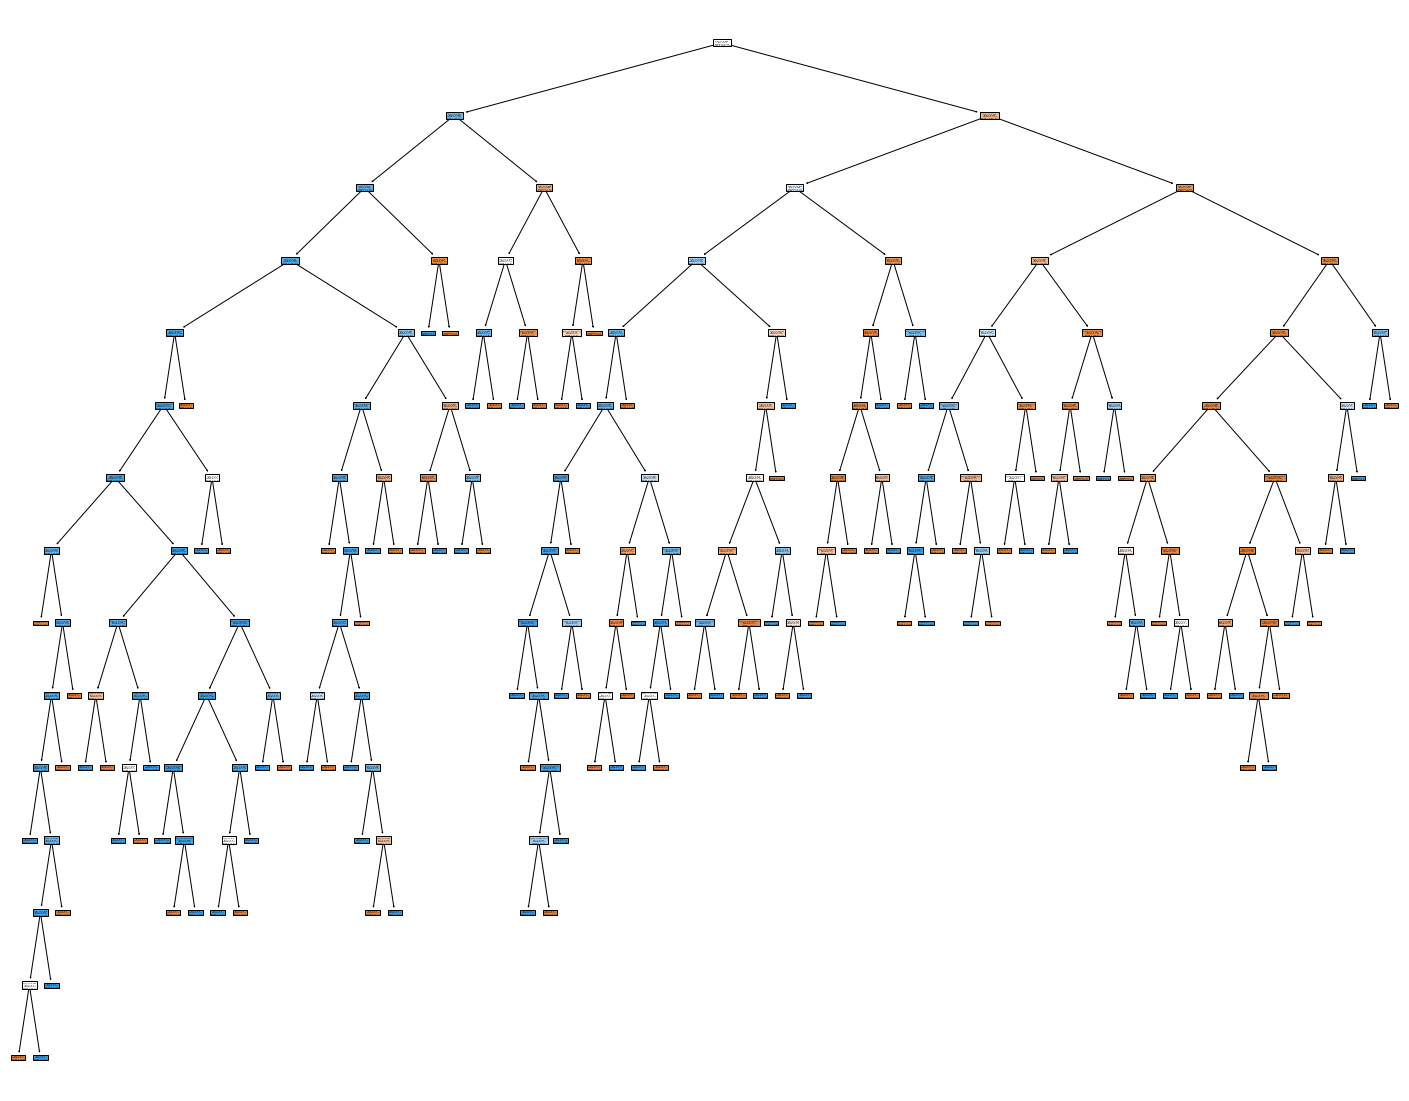

In [123]:
plt.figure(figsize=(25,20))
tree.plot_tree(Dtree_clf, filled = True)
plt.show()

<font color='green'><font size=3> Using cost complexity pruning to avoid overfitting

In [132]:
path = Dtree_clf.cost_complexity_pruning_path(X_train_smote, y_train_smote)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs= []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0, ccp_alpha= ccp_alpha)
    clf.fit(X_train_smote, y_train_smote)
    clfs.append(clf)
print("No. of node in previous tree is: {} with ccp_alpha : {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

No. of node in previous tree is: 1 with ccp_alpha : 0.11781722550953311


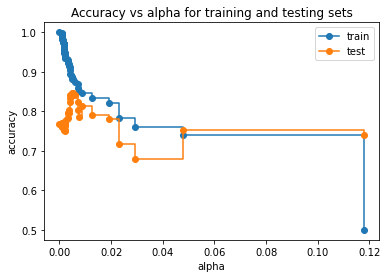

In [133]:
train_scores = [clf.score(X_train_smote, y_train_smote) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

<font color='green'><font size=3> From the graph above we can observe that the best alpha value to avoid overfitting can be 0.0048. Plotting decision tree with alpha 0.0048

In [138]:
clf_post = DecisionTreeClassifier(random_state= 0, ccp_alpha = 0.0048)
clf_post.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0048, random_state=0)

<font color='green'><font size=3> Checking the test accuracy of pruned tree

In [139]:
y_pred_dtree_post = clf_post.predict(X_test)
accuracy_score(y_test, y_pred_dtree_post)

0.84

<font color='green'><font size=3> Plotting pruned tree

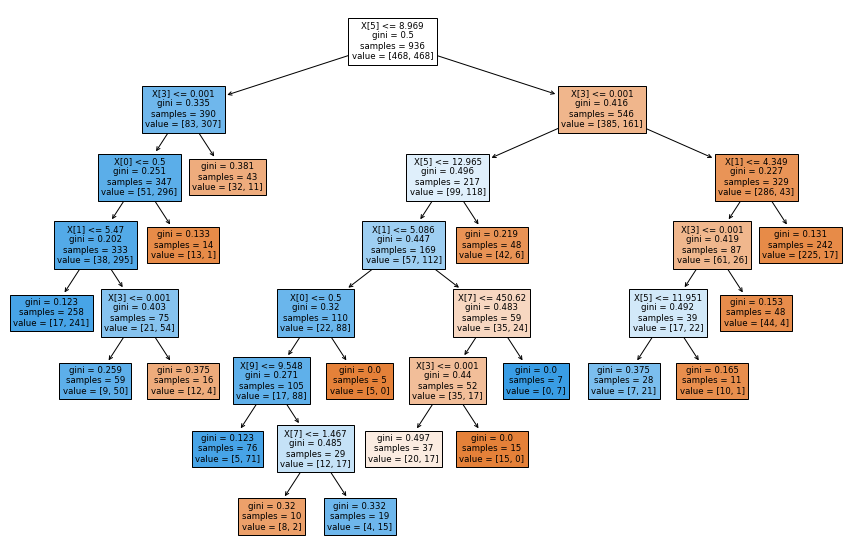

In [140]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_post, filled = True)
plt.show()

<font color='green'><font size=3> From the tree figure above now it looks that it is not overfitted and restricted to max depth of 7

<font color='green'><font size=3>  Implementing voting classifier on 3 best models to categorize the dependent variable y

In [141]:
eclf1 = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('Dtree', clf_post)], weights= [1,1,1], voting='soft')
vot_clas = eclf1.fit(X_train_smote, y_train_smote)

Fitting 15 folds for each of 5 candidates, totalling 75 fits
Fitting 15 folds for each of 10 candidates, totalling 150 fits
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=2, max_features=sqrt, mi

In [142]:
y_pred_voting = eclf1.predict(X_test)

In [143]:
confusion_matrix(y_test, y_pred_voting)
print (metrics.classification_report(y_test, y_pred_voting))
print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, y_pred_voting),3))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       222
           1       0.69      0.79      0.74        78

    accuracy                           0.85       300
   macro avg       0.81      0.83      0.82       300
weighted avg       0.86      0.85      0.86       300

Overall Accuracy: 0.853


In [145]:
train_voting_acc = eclf1.predict(X_train_smote)
confusion_matrix(y_train_smote, train_voting_acc)
print (metrics.classification_report(y_train_smote, train_voting_acc))
print ("Overall Accuracy:", round(metrics.accuracy_score(y_train_smote, train_voting_acc),3))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       468
           1       0.91      0.91      0.91       468

    accuracy                           0.91       936
   macro avg       0.91      0.91      0.91       936
weighted avg       0.91      0.91      0.91       936

Overall Accuracy: 0.91


# Training the model on whole train dataset


In [146]:
print(len(X))
print(len(y))

1000
1000


<font color='green'><font size=3> Checking counts of dependent variable

In [149]:
print(Counter(y))

Counter({0: 690, 1: 310})


<font color='green'><font size=3>  Using SMOTE

In [151]:
X_smote, y_smote = smote.fit_resample(X.astype('float'), y)
print("Before SMOTE" , Counter(y))
print("After SMOTE" , Counter(y_smote))

Before SMOTE Counter({0: 690, 1: 310})
After SMOTE Counter({0: 690, 1: 690})


<font color='green'><font size=3>  Building Random Forest, Xgboost and DecisionTree classifier

In [153]:
rf_train = randomForest(X_smote, y_smote)
xgb_train = xgboostClassifier(X_smote, y_smote)
guass_naive_train = gaussianNaive(X_smote, y_smote)
clf_post = DecisionTreeClassifier(random_state= 0, ccp_alpha = 0.0048)
clf_post.fit(X_smote, y_smote)

Fitting 15 folds for each of 10 candidates, totalling 150 fits
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; tota

DecisionTreeClassifier(ccp_alpha=0.0048, random_state=0)

<font color='green'><font size=3>  Building voting classifier using input models as Random forest, Xgboost and Decision tree

In [163]:
eclf1 = VotingClassifier(estimators=[('xgb', xgb_train), ('rf', rf_train), ('Dtree', clf_post)], weights= [1,1,1], voting='soft')
vot_clas = eclf1.fit(X_smote, y_smote)

Fitting 15 folds for each of 5 candidates, totalling 75 fits
Fitting 15 folds for each of 10 candidates, totalling 150 fits
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_depth=2, max_features=sqrt, mi

## Predicting the value of Test Dataset

<font color='green'><font size=3>  Adding all the parameters from individual csv

In [154]:
main_dir = "D:\\"
path = "Projects\\work_sample\\trip_data_test\\work_sample_test_trips"

In [156]:
os.chdir("D:\\Projects\\work_sample")
df = pd.read_csv("model_data_test.csv")
totalStops , turns, totalDistance = addingStops(main_dir, path), totalTurns(main_dir, path), distanceTravel(main_dir, path)
df['total_stops'] = totalStops
df['total_turns'] = turns
df['total_distance_travelled'] = totalDistance
# df.insert(totalStops, totalTurns, totalDistance)
df.head(10)

,filename,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,total_stops,total_turns,total_distance_travelled
0,1000.csv,False,False,True,6.002290,11021.870460,34626.227267,0.000986,5,9,1,1.954513e+02,22.269055,2.014536e+02,5.076019,99,17,4479.44
1,1001.csv,False,False,True,5.886440,11983.807690,37648.242201,0.000997,5,18,1,9.078651e+04,45.626548,9.079240e+04,5.105855,49,51,7065.22
2,1002.csv,True,False,True,5.465596,8028.071307,25220.929841,0.000985,6,15,1,6.150144e+07,501316.506956,6.150145e+07,5.925519,18,13,7850.99
3,1003.csv,False,False,True,4.553190,9232.252788,29003.977535,0.001005,7,7,1,2.743655e+00,0.088515,7.296845e+00,6.895799,29,3,10515.40
4,1004.csv,False,False,True,3.568974,9474.154588,29763.934451,0.000999,5,9,1,7.982789e+04,4.383958,7.983146e+04,5.237802,87,10,6687.29
5,1005.csv,False,False,True,2.981409,8544.065147,26841.972299,0.001012,4,8,1,1.509747e+03,1.911357,1.512729e+03,3.932646,43,1,6750.43
6,1006.csv,False,False,True,6.571420,11194.363330,35168.129599,0.000999,6,8,1,4.315667e+03,0.014066,4.322239e+03,5.980863,1,26,11491.01
7,1007.csv,False,False,False,3.882365,11117.089025,34925.365211,0.001009,7,15,1,6.083966e+01,9.223357,6.472203e+01,6.969745,0,0,15972.12
8,1008.csv,True,False,False,4.084713,9959.768149,31289.534449,0.001005,7,11,1,1.094962e+04,372.513530,1.095370e+04,7.064610,74,0,5477.17
9,1009.csv,False,False,False,4.799527,9514.389710,29890.336817,0.001000,4,7,1,2.687685e+02,69.607812,2.735680e+02,3.975249,9,12,9251.96


<font color='green'><font size=3> Checking missing values

In [157]:
features_with_na = [features for features in df.columns] 
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,4),'% missing values')

filename 0.0 % missing values
feature1 0.0 % missing values
feature2 0.0 % missing values
feature3 0.0 % missing values
feature4 0.0 % missing values
feature5 0.0 % missing values
feature6 0.0 % missing values
feature7 0.0 % missing values
feature8 0.0 % missing values
feature9 0.0 % missing values
feature10 0.0 % missing values
feature11 0.0 % missing values
feature12 0.0 % missing values
feature13 0.0 % missing values
feature14 0.0 % missing values
total_stops 0.0 % missing values
total_turns 0.0 % missing values
total_distance_travelled 0.0 % missing values


<font color='green'><font size=3> Dropping all the features which were dropped previously

In [158]:
df.drop("feature2", inplace = True, axis = 1)
df["feature1"] = df["feature1"].astype(int)
df.drop(["filename", "feature3", "feature6", "feature13", "feature10", "feature14"], inplace = True, axis = 1)

In [161]:
df.head(10)

,feature1,feature4,feature5,feature7,feature8,feature9,feature11,feature12,total_stops,total_turns,total_distance_travelled
0,0,6.002290,11021.870460,0.000986,5,9,1.954513e+02,22.269055,99,17,4479.44
1,0,5.886440,11983.807690,0.000997,5,18,9.078651e+04,45.626548,49,51,7065.22
2,1,5.465596,8028.071307,0.000985,6,15,6.150144e+07,501316.506956,18,13,7850.99
3,0,4.553190,9232.252788,0.001005,7,7,2.743655e+00,0.088515,29,3,10515.40
4,0,3.568974,9474.154588,0.000999,5,9,7.982789e+04,4.383958,87,10,6687.29
5,0,2.981409,8544.065147,0.001012,4,8,1.509747e+03,1.911357,43,1,6750.43
6,0,6.571420,11194.363330,0.000999,6,8,4.315667e+03,0.014066,1,26,11491.01
7,0,3.882365,11117.089025,0.001009,7,15,6.083966e+01,9.223357,0,0,15972.12
8,1,4.084713,9959.768149,0.001005,7,11,1.094962e+04,372.513530,74,0,5477.17
9,0,4.799527,9514.389710,0.001000,4,7,2.687685e+02,69.607812,9,12,9251.96


<font color='green'><font size=3> Predicting output class using voting classifiers output

In [174]:
final_prediction = vot_clas.predict(df)
print(final_prediction)

[1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1
 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1
 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0
 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 

In [179]:
print(Counter(final_prediction))

Counter({0: 574, 1: 302})


<font color='green'><font size=3> Saving output class to csv file

In [172]:
output = pd.DataFrame(final_prediction)
output.to_csv("final_output.csv")